# 03-1 k-최근접 이웃 회귀
### 지도 학습의 한 종류인 회귀 문제를 이해하고 k-최근접 이웃 알고리즘을 사용해 농어의 무게를 예측하는 회귀 문제를 풀어봅시다.

02장에서는 도미와 빙어를 구분하는 머신러닝 모델을 만들었지만 이번에는 무게를 예측 해야하는 모델을 만들어야함  
지도 학습에는 크게 분류와 회귀로 나뉨  
>**회귀란?** 두 변수 사이의 상관관계를 분석하는 방법  
**k-최근접 이웃 분류** : 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하여 그중 다수의 클래스를 새로운 샘플의 클래스로 예측함   
**k-최근접 이웃 회귀** : 예측하려는 샘플에 가장 가까운 샘플 k개를 선택하여 이 샘플들의 평균을 구하면 됨  
## 데이터 준비

In [8]:
import numpy as np
# 넘파이 배열로 perch_lenth, perch_weight 배열 만듬
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])


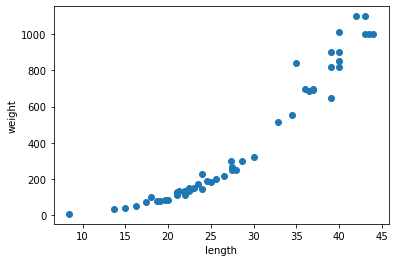

In [9]:
# 데이터의 산점도
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 커짐에 따라 무게도 늘어남  

농어 데이터를 머신러닝 모델에 사용하기 전에 훈련 세트와 테스트 세트로 나눔

In [10]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
# perch_length가 1차원 배열이기 때문에 train_input, test_input도 1차원 배열이다.
# 사이킷런에 사용할 훈련세트는 2차원 배열이어야 하기때문에 1차원 배열을 2차원 배열로 만들어준다.
#[1,2,3] -> [[1],[2],[3]]
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
# 2차원 배열로 바꾼 결과
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수($R^2$)  
사이킷런에서 k-최근접 이웃 회귀 알고리즘을 구현한 클래스는 KNeighborRegressor이다. 

이 클래스의 사용법은 KNeightborsClassifier와 매우 비슷하다. 객체를 생성하고 fit() 메서드로 회귀 모델을 훈련하면 된다. 

In [11]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련한다.
knr.fit(train_input, train_target)
print(knr.score(test_input, test_target))

0.992809406101064


저 점수는 무엇일까??  

분류의 경우 테스트 세트에 있는 샘플을 정확하게 분류한 개수의 비율  (**정확도**)  

회귀의 경우에는 **결정계수**, **$R^2$**

>## $R^2$ = 1 - $(타깃 - 예측)^2의 합\over(타깃 - 평균)^2의 합$  

정확도 처럼 $R^2$가 얼마나 좋은지 이해하기는 어렵다.  

그래서 타깃과 예측한 값 사이의 차이를 구해보면 어느정도 예측이 벗어났는지 가늠하기 좋다.  

사이킷런의 sklearnmertrics 패키지의 mean_absolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환함  

In [12]:
from sklearn.metrics import mean_absolute_error

# 테스트 세트에 대한 예측을 만듭니다.
test_prediction = knr.predict(test_input)

# 테스트 세트에 대한 평균 절대값 오차를 계산합니다.
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


결과에서 예측이 평균적으로 19g 정도 타깃값과 다르다는 것을 알 수 있다.  

## 과대적합 vs 과소적합  
앞에서 훈련한 모델을 사용해 훈련 세트의 $R^2$ 점수를 확인해보자

In [13]:
print(knr.score(train_input, train_target))

0.9698823289099254


만약 훈련세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 **과대적합**되었다고 말함  

즉 훈련 세트에만 잘 맞는 모델

반대로 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 너무 낮은 경우에는 **과소적합**되었다고 말한다.  

즉 모델이 너무 단순하여 훈련세트에 적절히 훈련되지 않은 경우이다.

> 과소적합이 일어나는 이유 : 또 다른 원인은 훈련 세트와 테스트 세트의 크기가 너무 작기 때문  

따라서 훈련 세트가 전체 데이터를 대표한다고 가정하기 때문에 훈련세트를 잘 학습하는 것이 중요하다!  

훈련 세트보다 테스트 세트의 점수가 높으니 **과소적합**이다. 어떻게 해결할 수 있을까?

>모델을 조금 더 복잡하게 만들면 된다!

어떻게? 이웃의 개수 k를 줄인다

>이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따른다.

In [15]:
# 이웃의 개수를 3으로 설정한다.
knr.n_neighbors = 3

# 모델을 다시 훈련한다.
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


k값을 줄이니 훈련세트의 $R^2$점수가 높아졌다  

테스트 세트의 점수는?

In [16]:
print(knr.score(test_input, test_target))

0.9746459963987609


예상대로 테스트 세트의 점수는 훈련 세트보다 낮아졌으므로 과소적합 문제를 해결한 것 같다  

또한 두 점수의 차이가 크지 않으므로 이 모델이 과대적합 된 것 같지도 않다.

## 회귀 문제 다루기 <문제해결 과정>

이번에는 농어의 높이, 길이 등의 수치로 무게를 예측해 보았다. 이 문제는 분류가 아니라 **회귀** 문제이다. 회귀는 임의의 수치를 예측하는 문제이다.

따라서 무게를 예측하는 **k-최근접 이웃 회귀** 모델을 만들었다.

k-최근접 이웃 회귀 모델은 분류와 동일하게 가장 먼저 가까운 k개의 이웃을 찾는다. 그다음 이웃샘플의 타깃값을 편균하여 이 샘플의 예측값으로 사용한다.

사이킷런은 회귀 모델의 점수로 $R^2$, 즉 **결정계수** 값을 반환한다. 1에 가까울수록 좋다.

정량적인 평가를 하고 싶다면 사이킷런에서 제공하는 다른 평가도구를 사용할 수 있다. 대표적으로 **절댓값 오차**가 있다.

모델을 훈련하고 나서 훈련 세트와 테스트 세트에 대해 모두 평가 점수를 구할 수있다.

훈련 세트의 점수과 테스트 세트의 점수 차이가 크면 좋지않다.

일반적으로 훈련 세트의 점수가 테스트 세트보다 조금 더 높다.

만약 테스트 세트의 점수가 너무 낮다면 모델이 훈련 세트에 과도하게 맞춰진 것이다. 이것을 **과대적합** 이라고 한다.

반대로 테스트 세트 점수가 너무 높거나 두 점수가 모두 낮으면 **과소적합**이다.

**과대적합**일 경우 모델을 덜 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k값을 늘린다.
**과소적합**일 경우 모델을 더 복잡하게 만들어야 한다. k-최근접 이웃의 경우 k값을 줄인다.